# Ch. 3

In [17]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.labels import label_date, label_dollar, label_percent, label_comma

p9options.figure_size = (6.4, 4.8)
theme_set(theme_minimal())

In [18]:
# dataset packages
from gapminder import gapminder

## Fig. 3.3

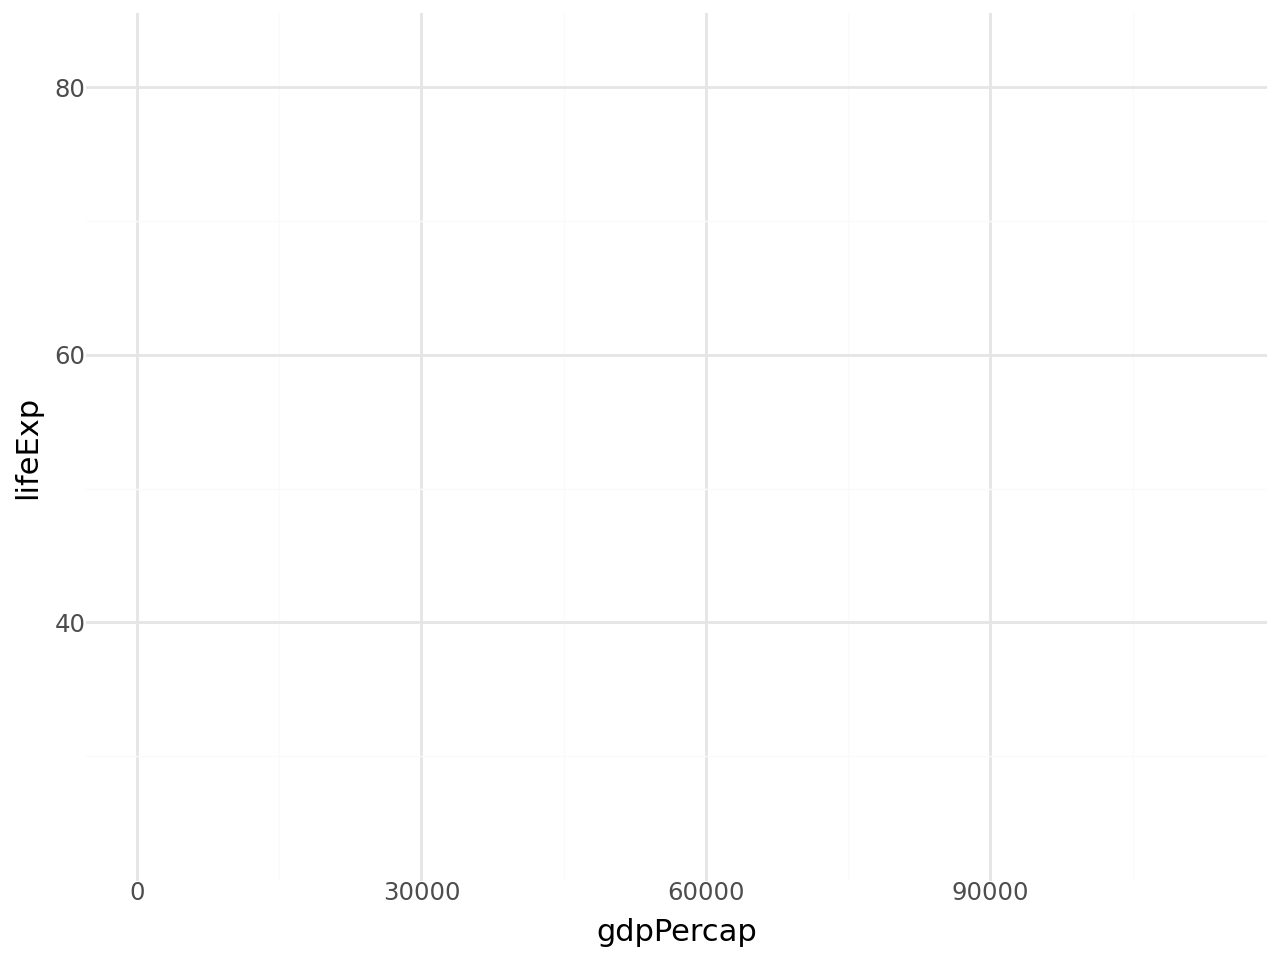

In [19]:
p = ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
p

## Fig. 3.4

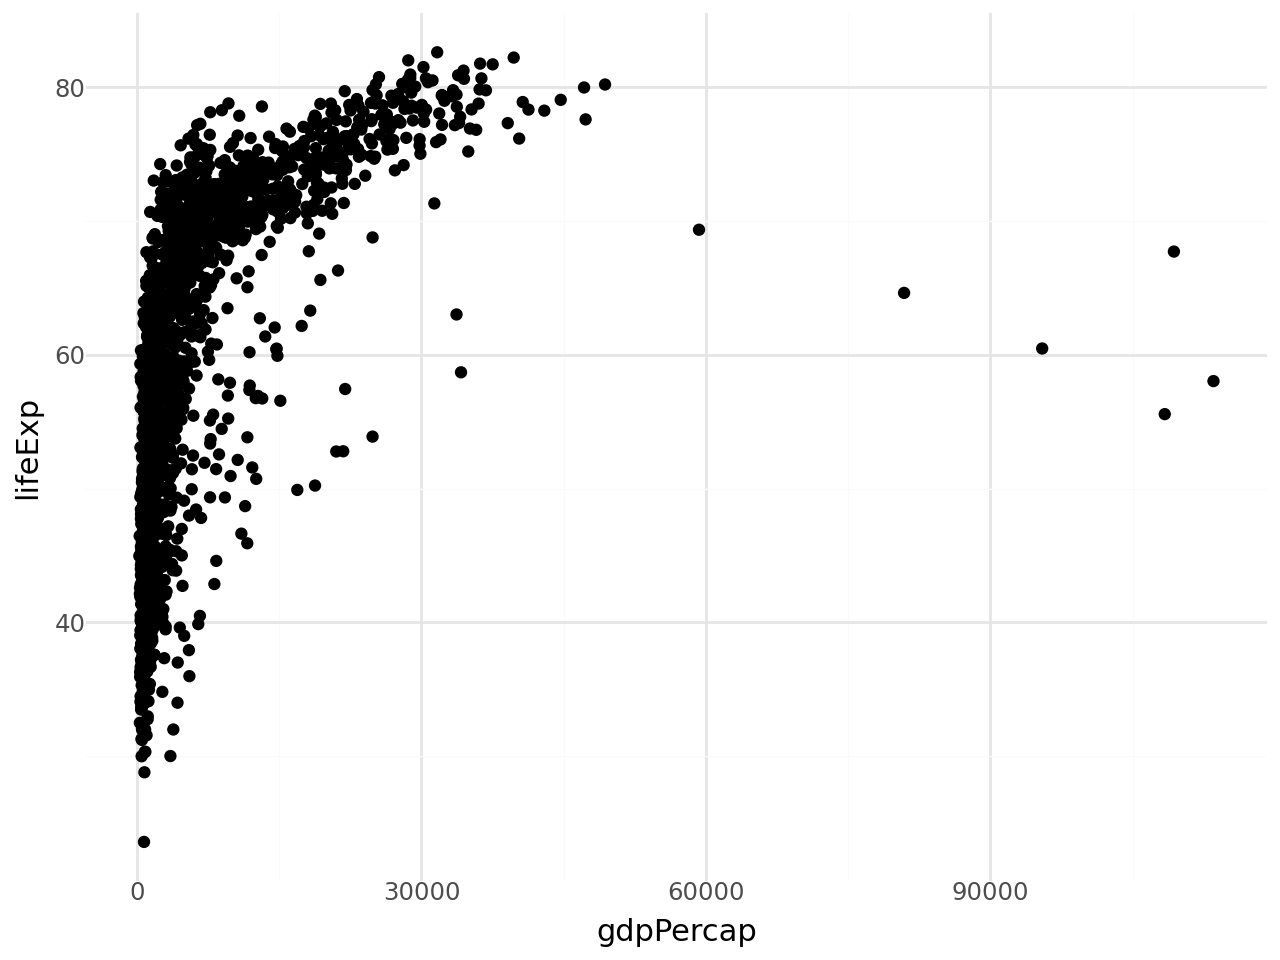

In [20]:
p = ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
p + geom_point()

## Fig. 3.5

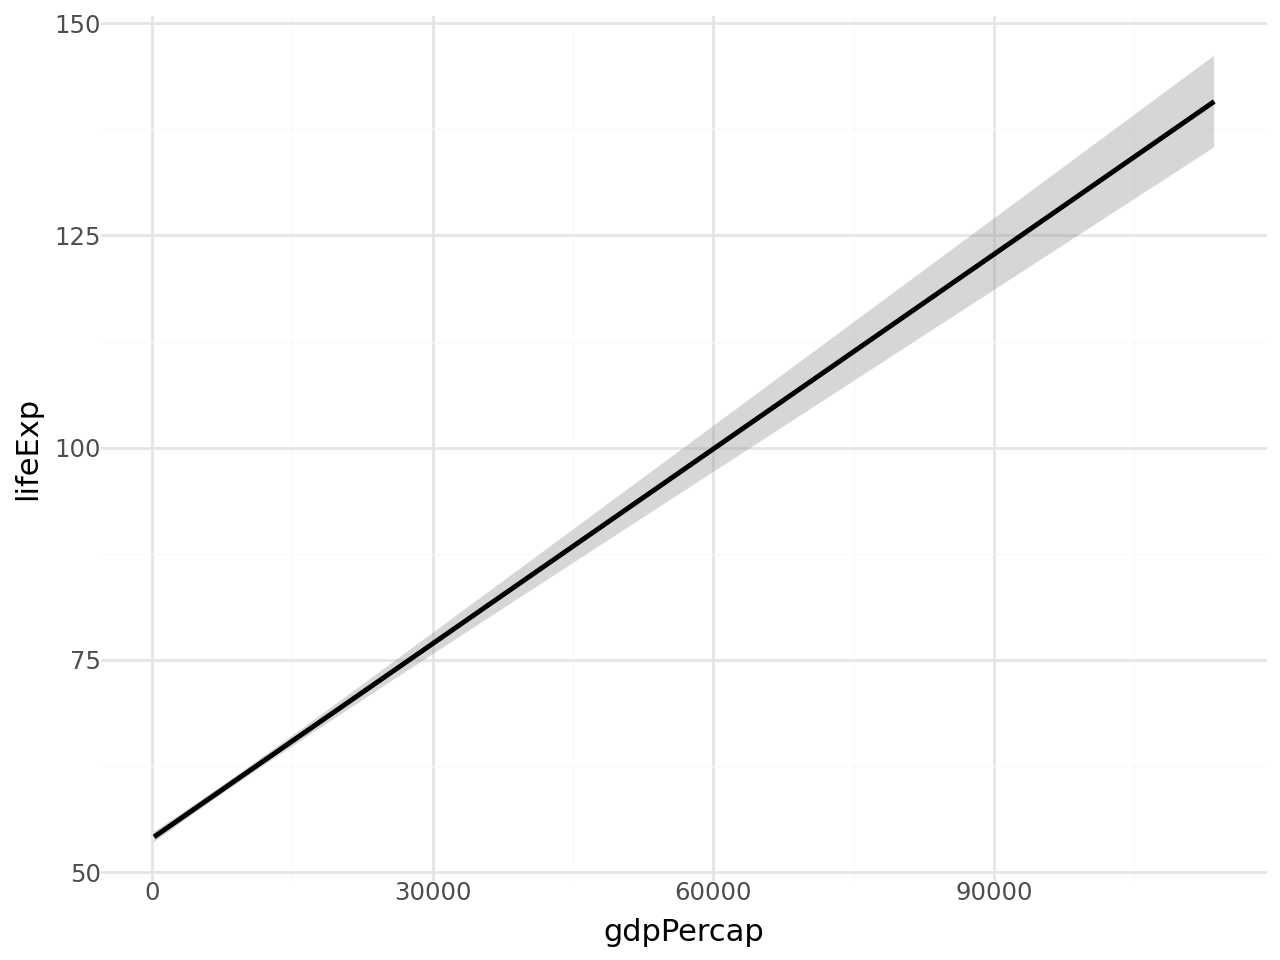

In [21]:
p = ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
p + geom_smooth()

## Fig. 3.6

NOTE 1: Currently (v0.8) `geom_smooth` doesn't support the generalized additive models (GAM). So I insteadly specify LOESS in this material.

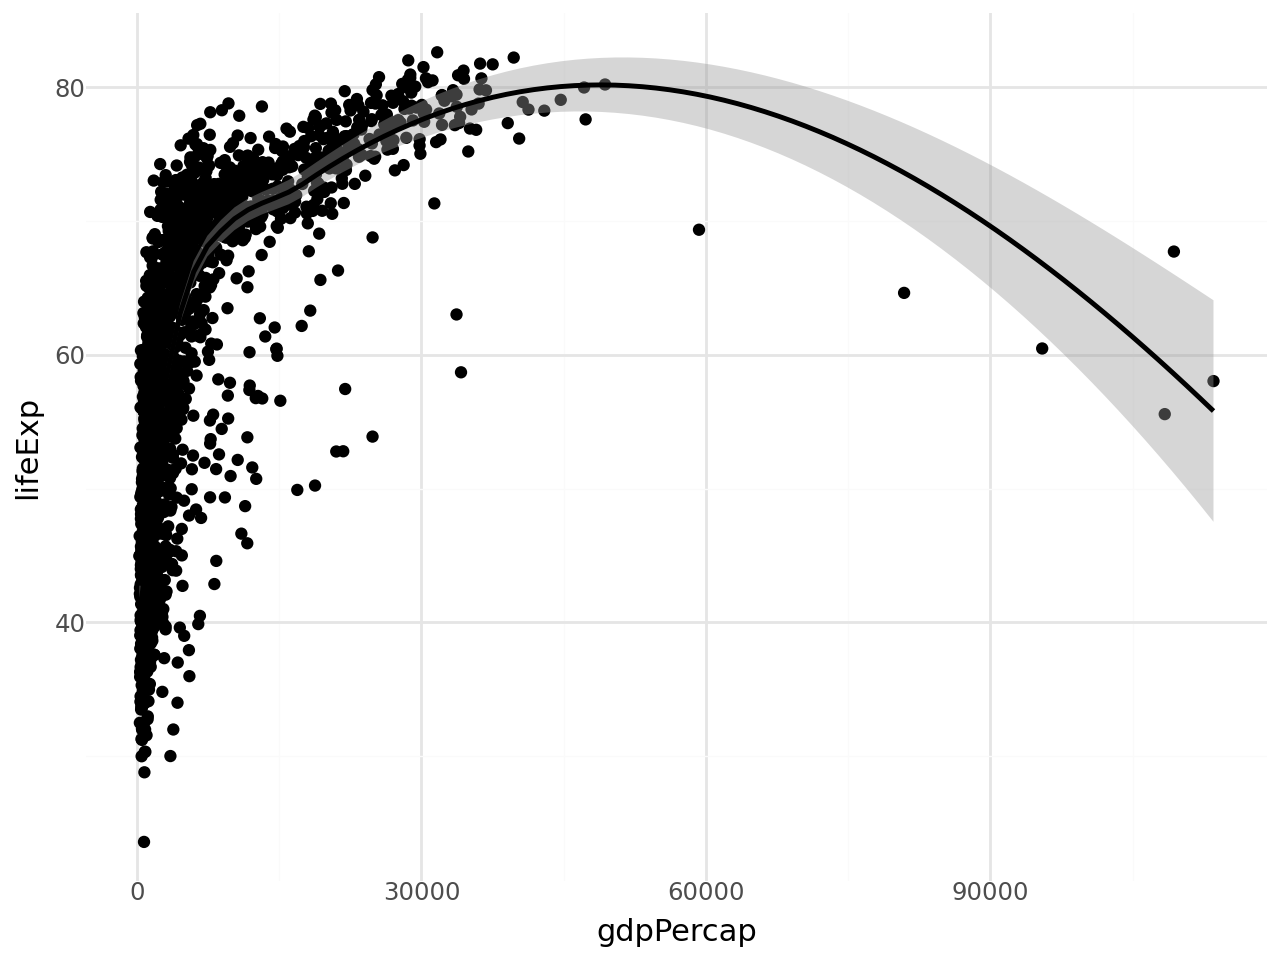

In [22]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth(method='loess')

NOTE 2: If you really want to plot smoothing curve by GAM, you can import a GAM class from **statsmodels**.

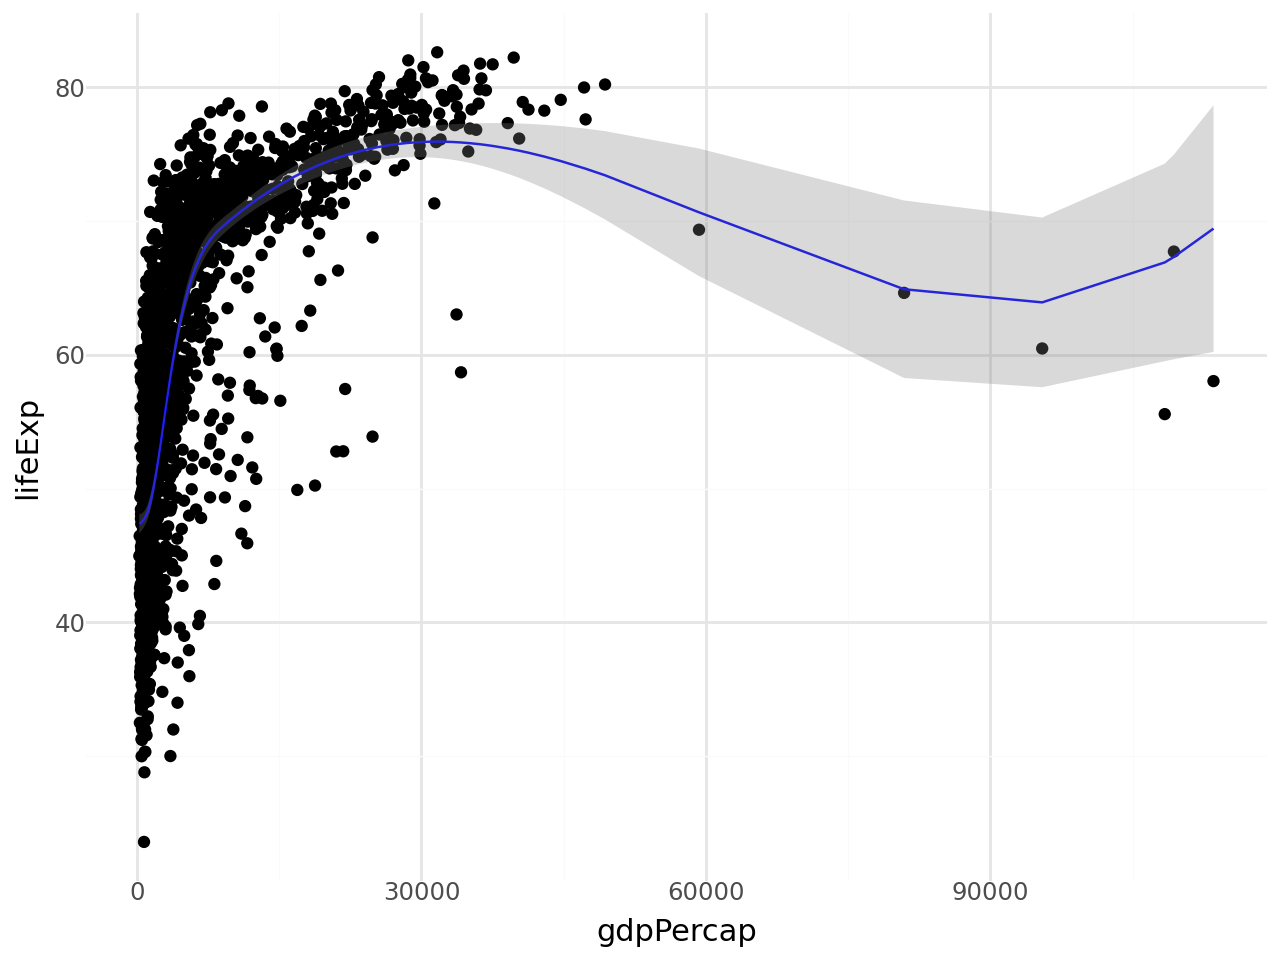

In [23]:
from statsmodels.formula.api import glmgam
from statsmodels.gam.api import CyclicCubicSplines

cs = CyclicCubicSplines(gapminder[['gdpPercap']], df=[4]) # TODO: Is it equal to ggplot2's default?

gam = glmgam(formula='lifeExp ~ gdpPercap', data=gapminder, smoother=cs).fit()

ggplot(
    pd.concat([gapminder,
               gam.get_prediction().summary_frame(alpha=.05)
              ], axis=1),
    aes(x = 'gdpPercap', y='lifeExp')
) + geom_point() + geom_line(aes(y='mean'), color='blue'
) + geom_ribbon(aes(ymin='mean_ci_lower', ymax='mean_ci_upper'), alpha=.3, fill='gray')

## Fig. 3.7

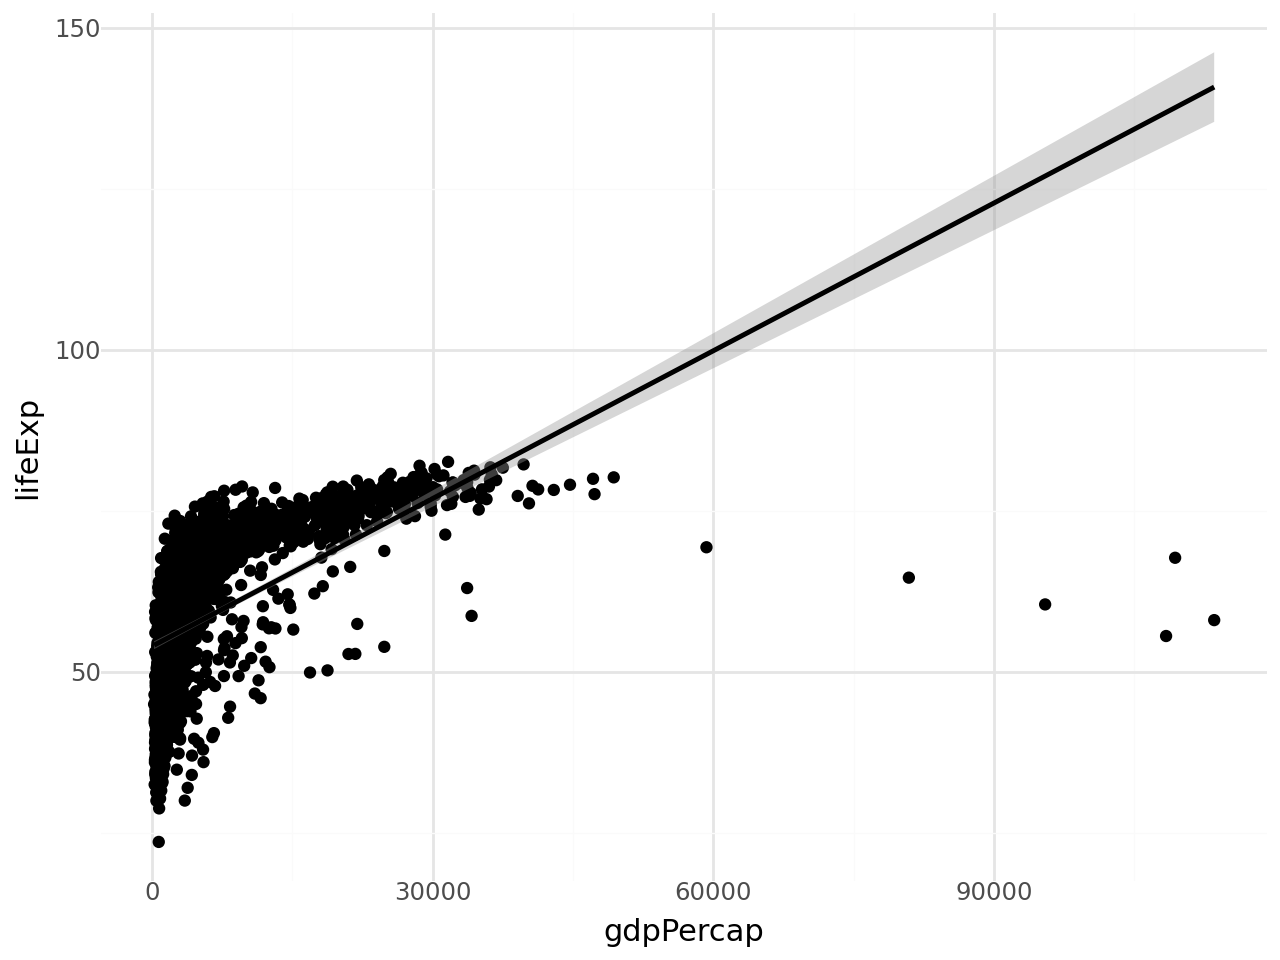

In [24]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth(method="lm")

## Fig. 3.8

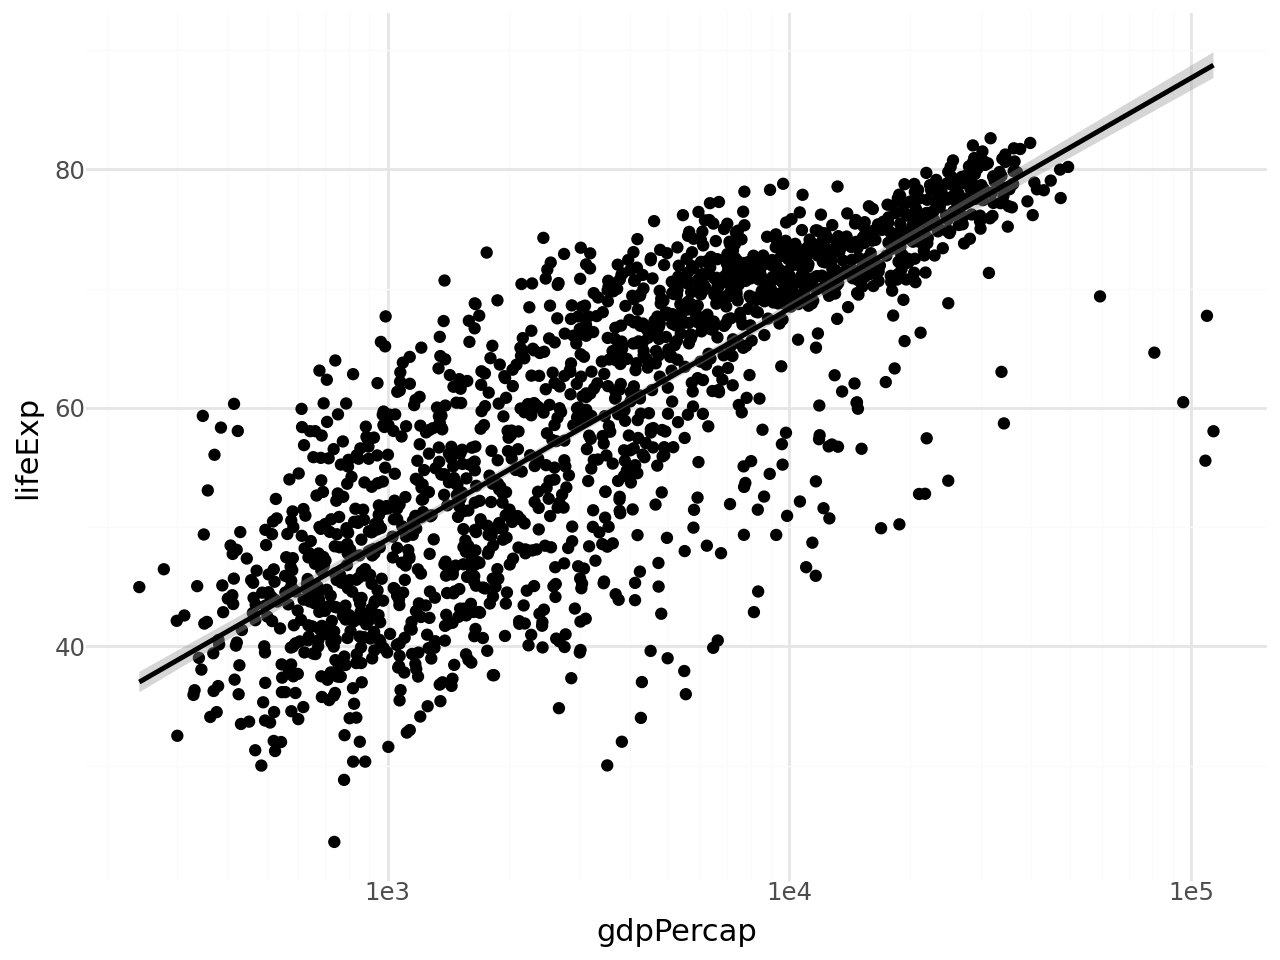

In [25]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth() + scale_x_log10()

## Fig. 3.9

NOTE: **scales** package doesn't exist in Python, but **[mizani](https://mizani.readthedocs.io/en/stable/)** package provides equivalent functions. For example, `scales::dollar` is equivalent to `mizani.labels.label_dollar`.

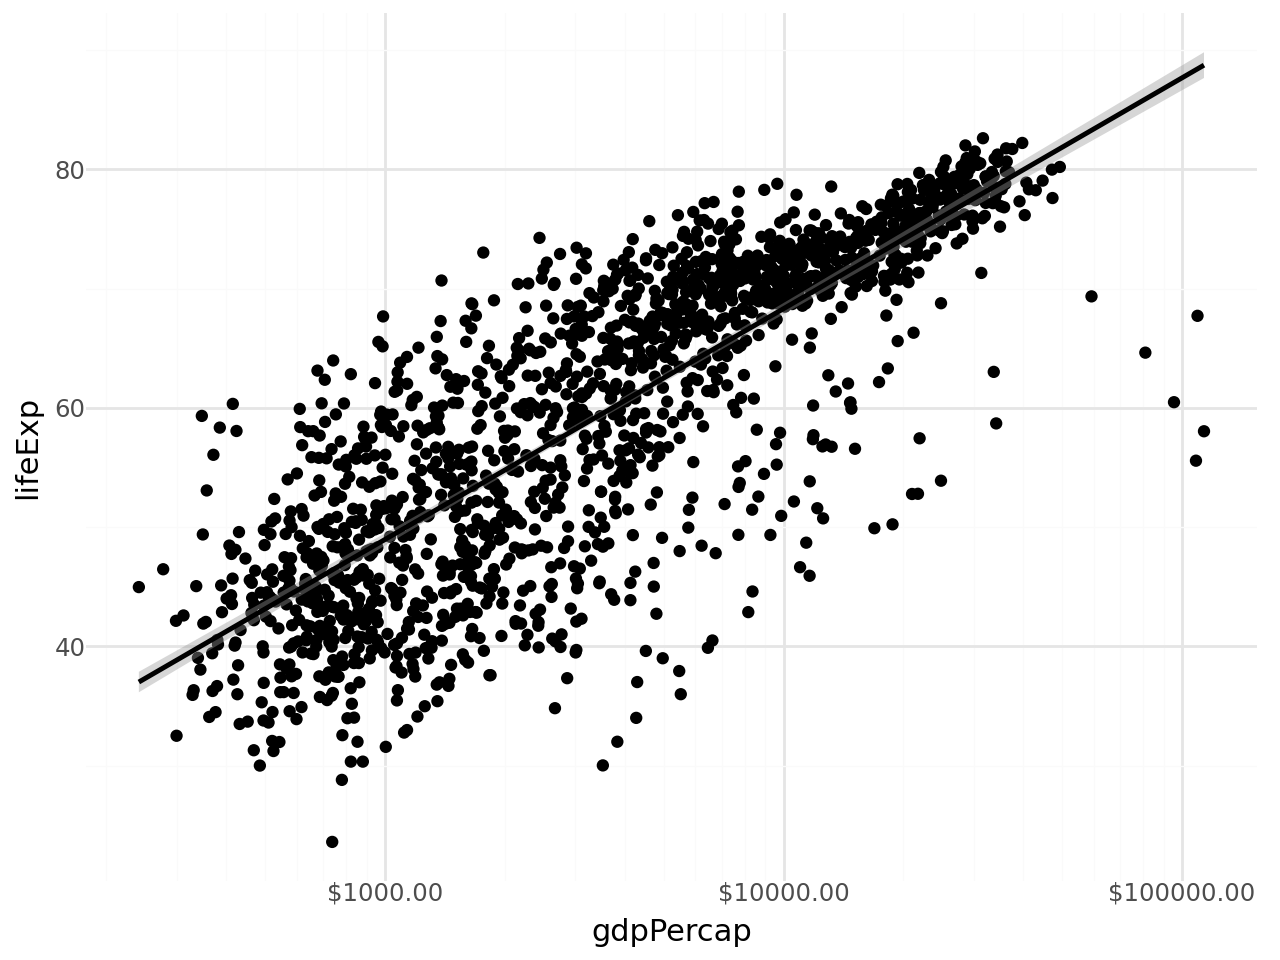

In [26]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth() + scale_x_log10(labels=label_dollar())

## Fig. 3.11

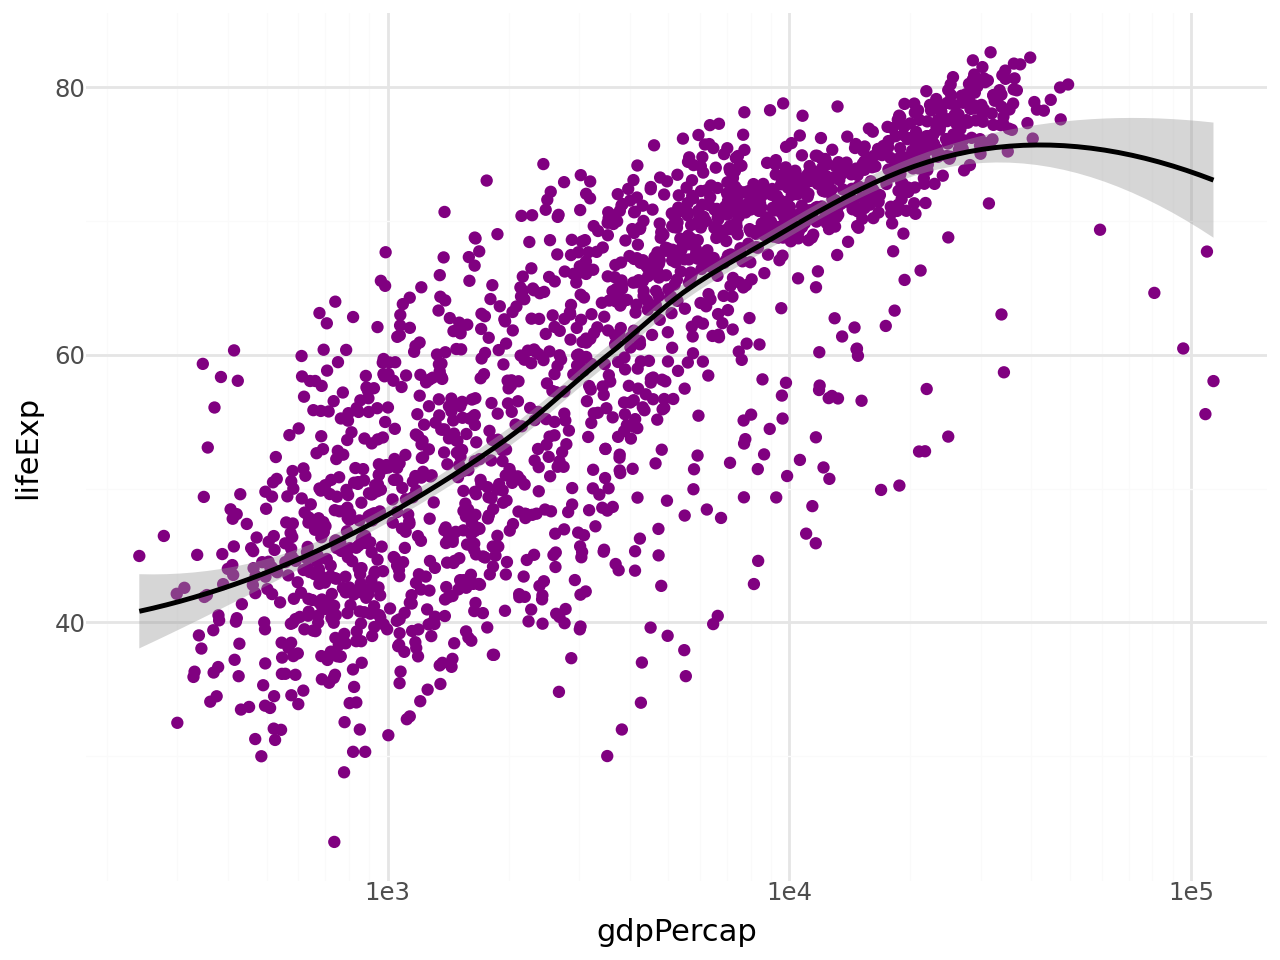

In [27]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(color='purple') + geom_smooth(method='loess') + scale_x_log10()

## Fig. 3.12

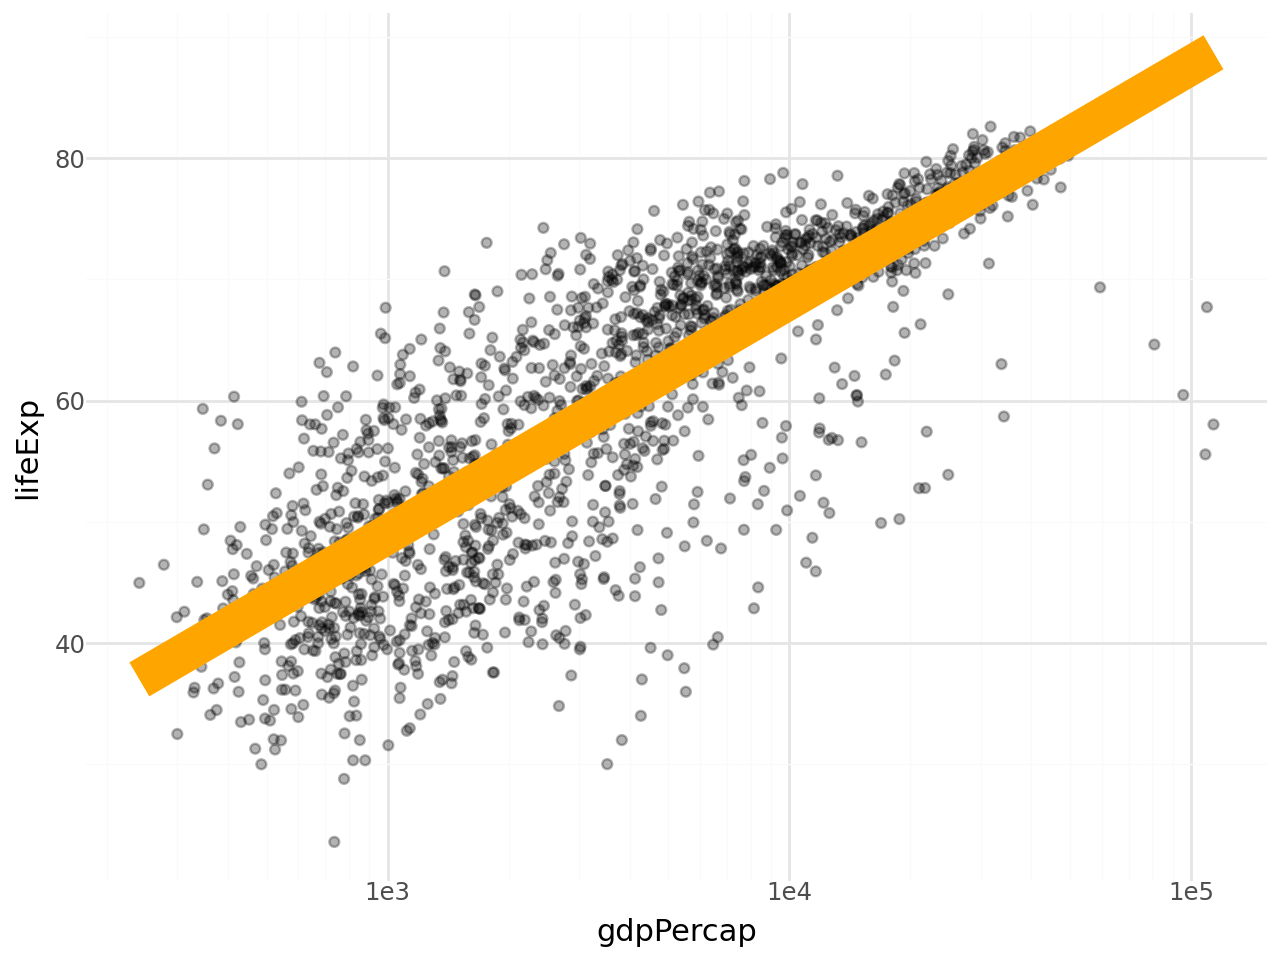

In [28]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(alpha=.3) + geom_smooth(
  color='orange', se=False, size=8, method='lm'
) + scale_x_log10()

## Fig. 3.13

NOTE: Currently (v0.8) plotnine cannot display a subtitle and caption. So I merged these strings into `title`

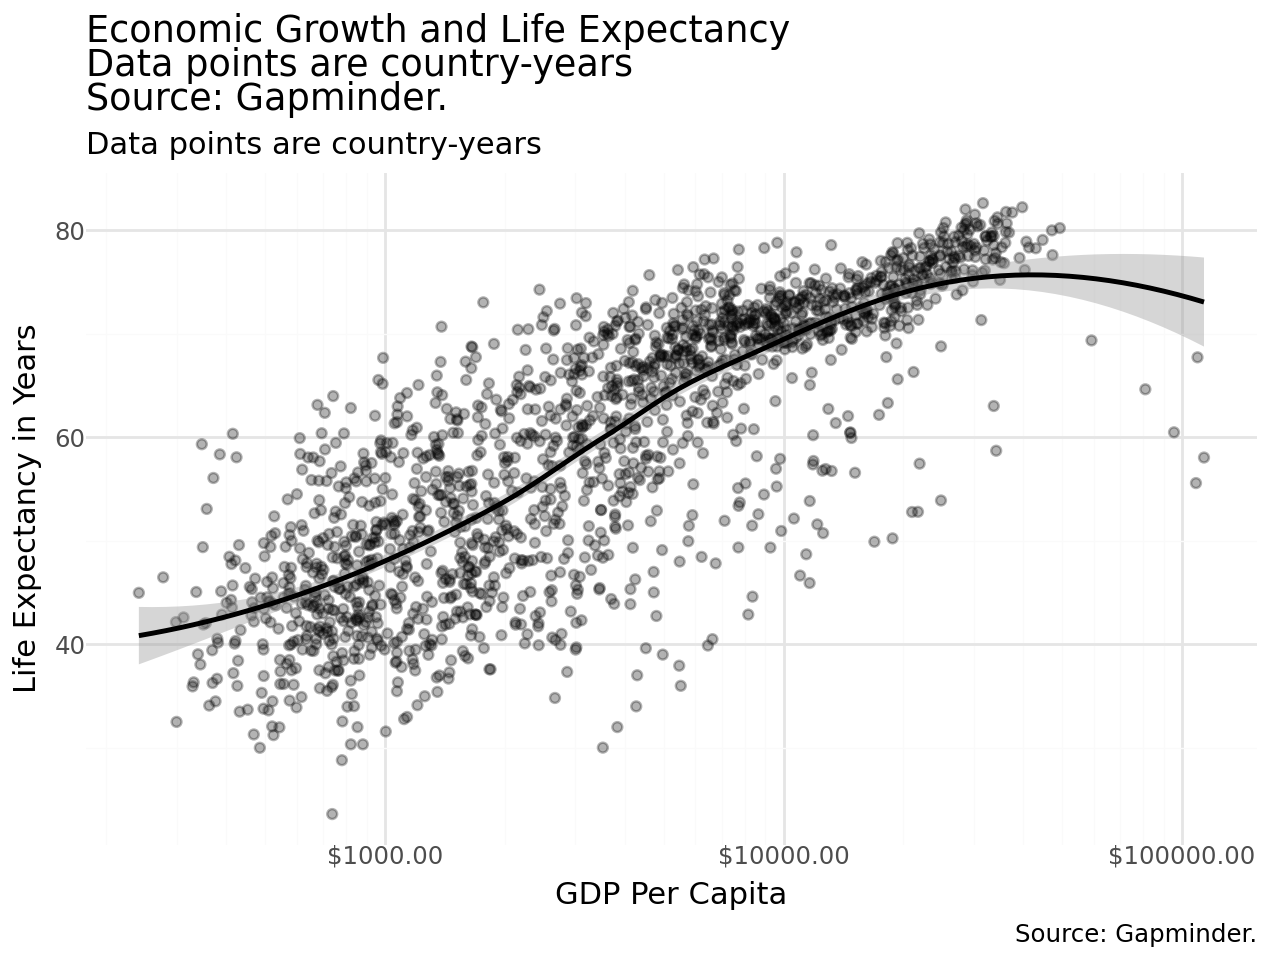

In [29]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(alpha=0.3) + geom_smooth(method='loess'
) + scale_x_log10(
  labels = label_dollar()
) + labs(
  x="GDP Per Capita",
  y="Life Expectancy in Years",
  title='\n'.join([
    "Economic Growth and Life Expectancy",
    "Data points are country-years",
    "Source: Gapminder."
  ]),
  subtitle="Data points are country-years",
  caption="Source: Gapminder."
)

## Fig. 3.14

NOTE: Currently (v0.8) **plotnine**'s default qualitative color mapping is different from ggplot's default (slightly higher brightness). You can approximate by adding `scale_color_hue()` like the following code (but it is not perfectly equivalent). If you prefer to lower-brightness color mappings, It would be also good idea to use `scale_color_cmap_d()`. The available color mapping name is listed in [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). The scler functions are quite differnt from **ggplot2**. I will explain the scaler functions in detail at the appendix on **plotnine**.

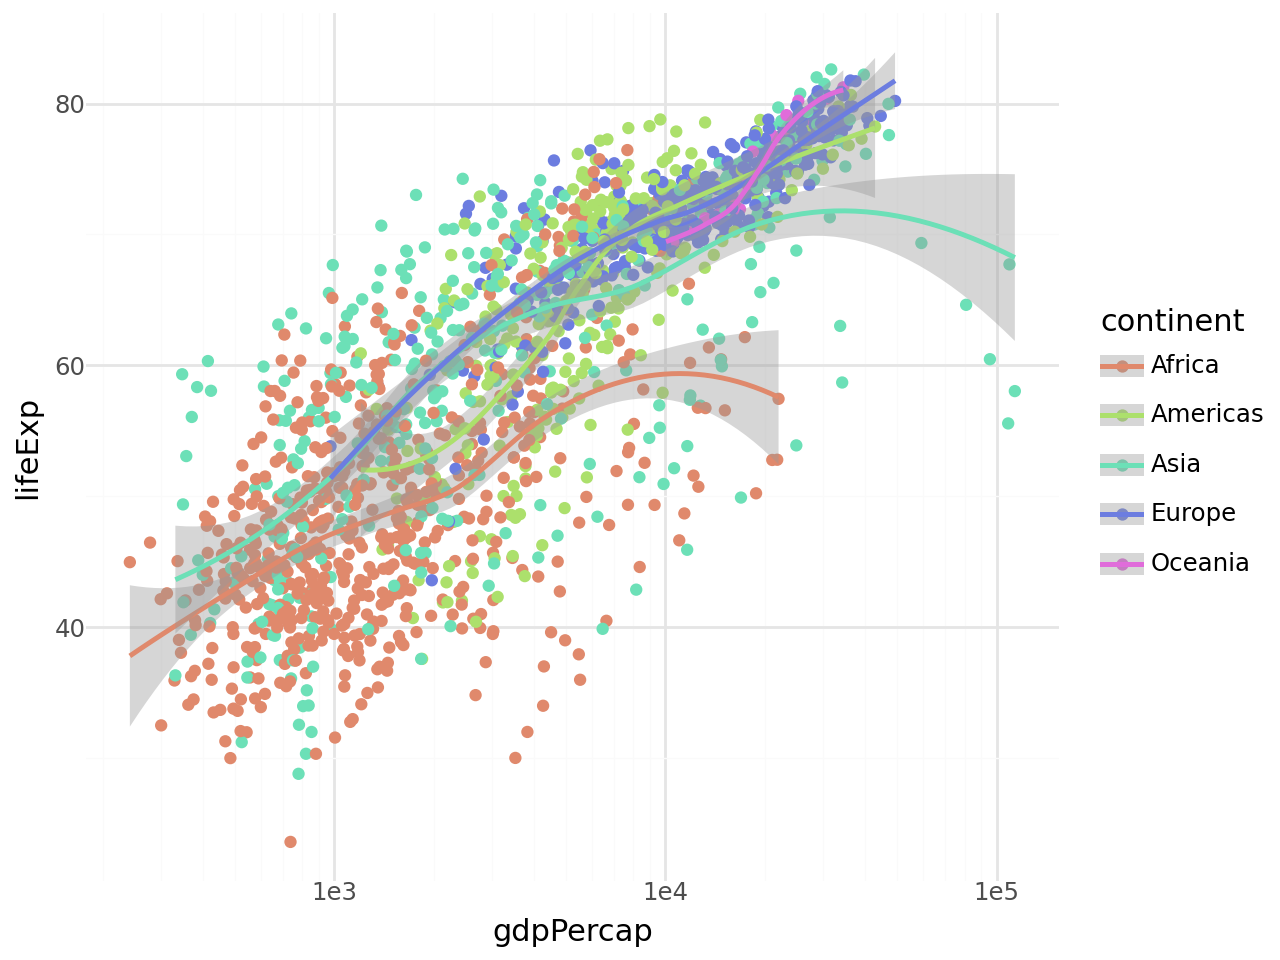

In [30]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp', color='continent'))
p + geom_point() + geom_smooth(method='loess'
) + scale_x_log10(
) + scale_color_hue(h=0.0416, l=0.65, s=.65)

## Fig. 3.15

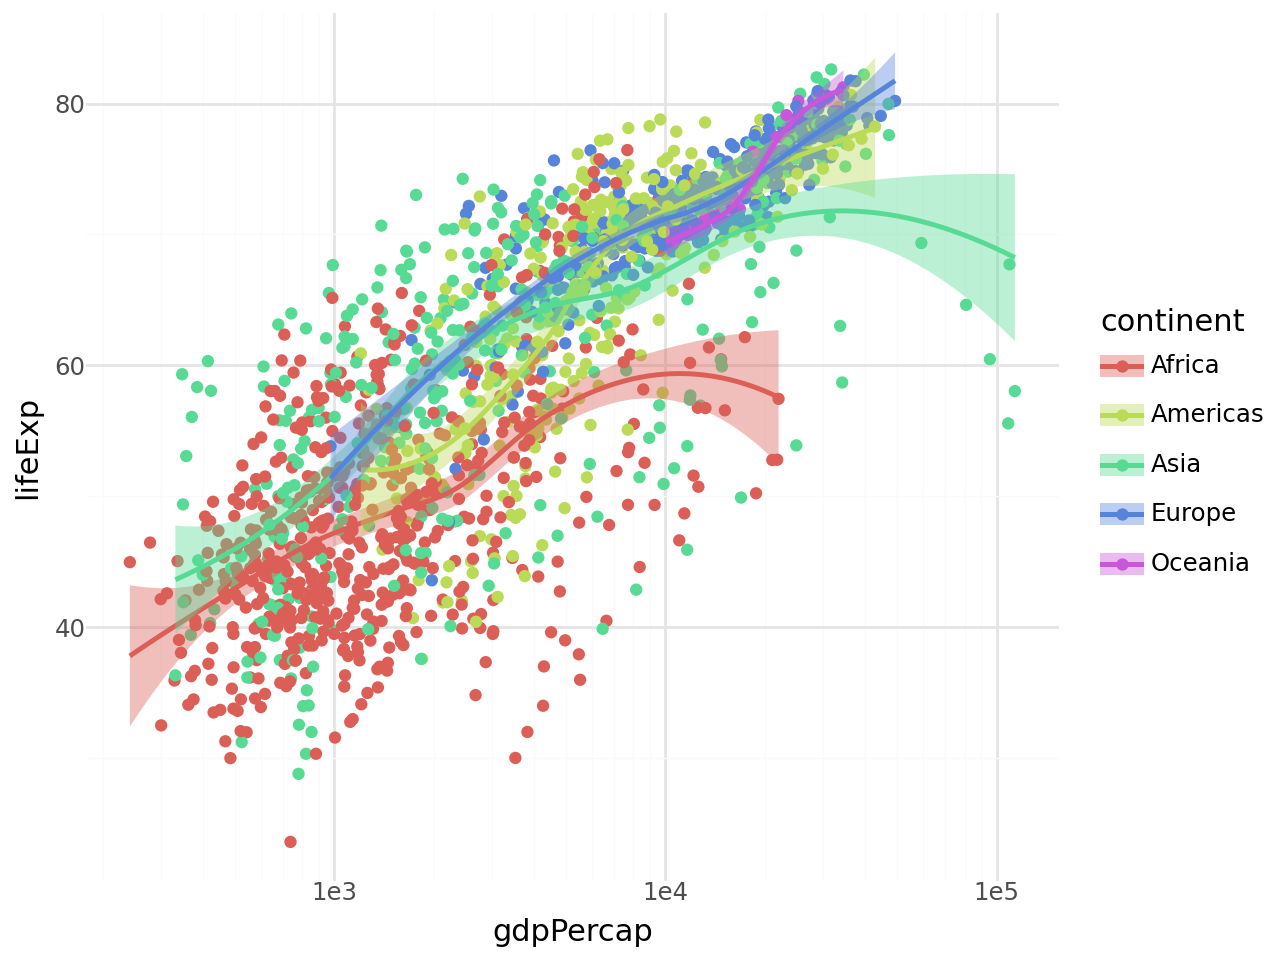

In [31]:
p = ggplot(
  gapminder,
  aes(x = 'gdpPercap', y='lifeExp', color='continent', fill='continent')
)
p + geom_point() + geom_smooth(method='loess') + scale_x_log10()

## Fig. 3.16

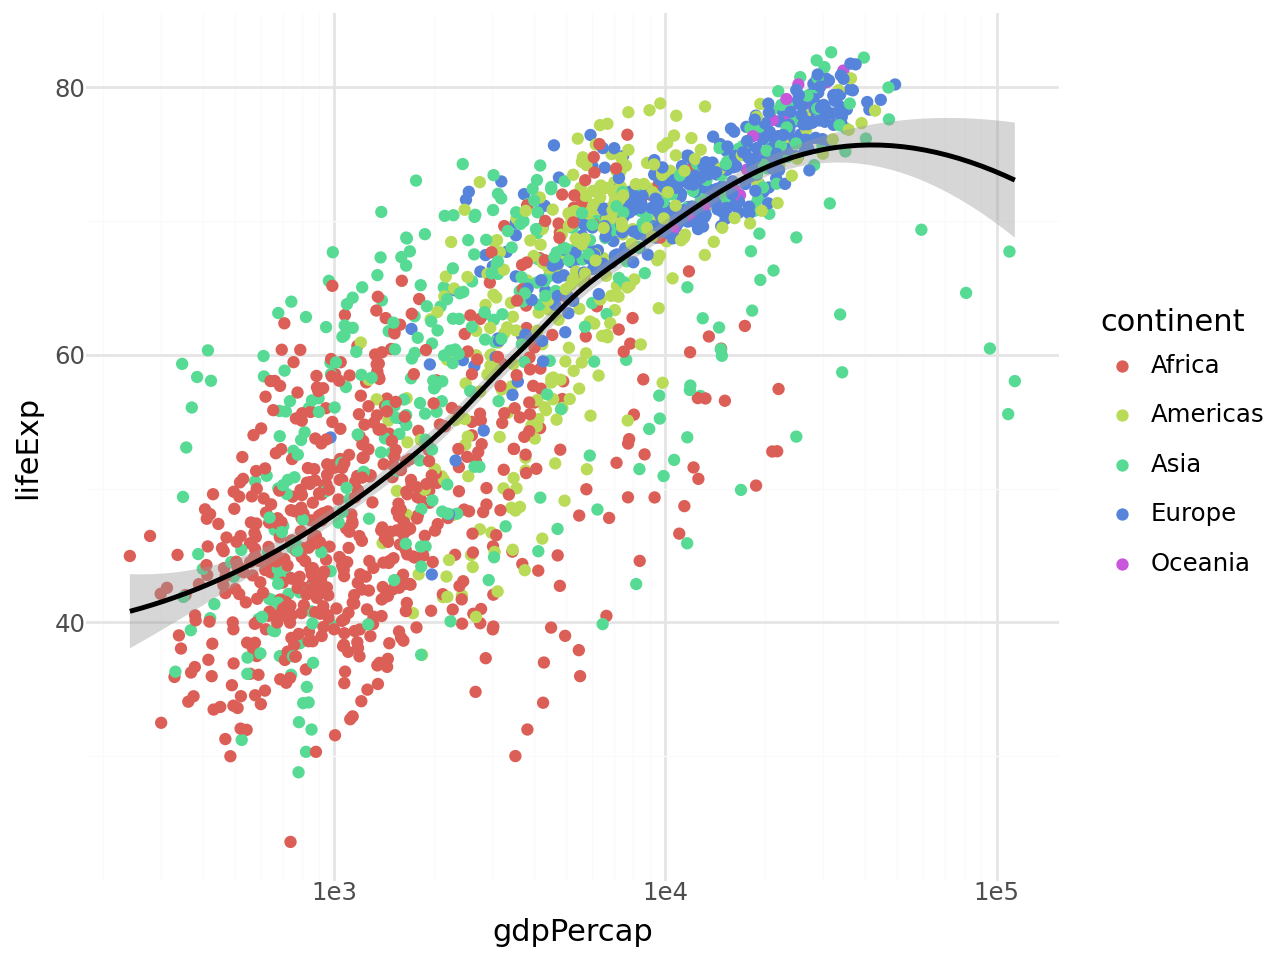

In [32]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(aes(color='continent')) + geom_smooth(method='loess'
) + scale_x_log10()

## Fig 3.17

NOTE: A String in `aes()` is evaluated as an expression. Pandas column name is regarded as numpy array. So you can use numpy functions like the following example.

NOTE: Currently (v0.8) plotnine's default continuous color palette is different from ggplot2's. plotnine's default palette is `viridis`, which is equivalent to one provided by viridis package in R. If you prefer to ggplot2's default color, you may add `scale_color_continuous('Blues')` like the following code. (But this color mapping is reversed)

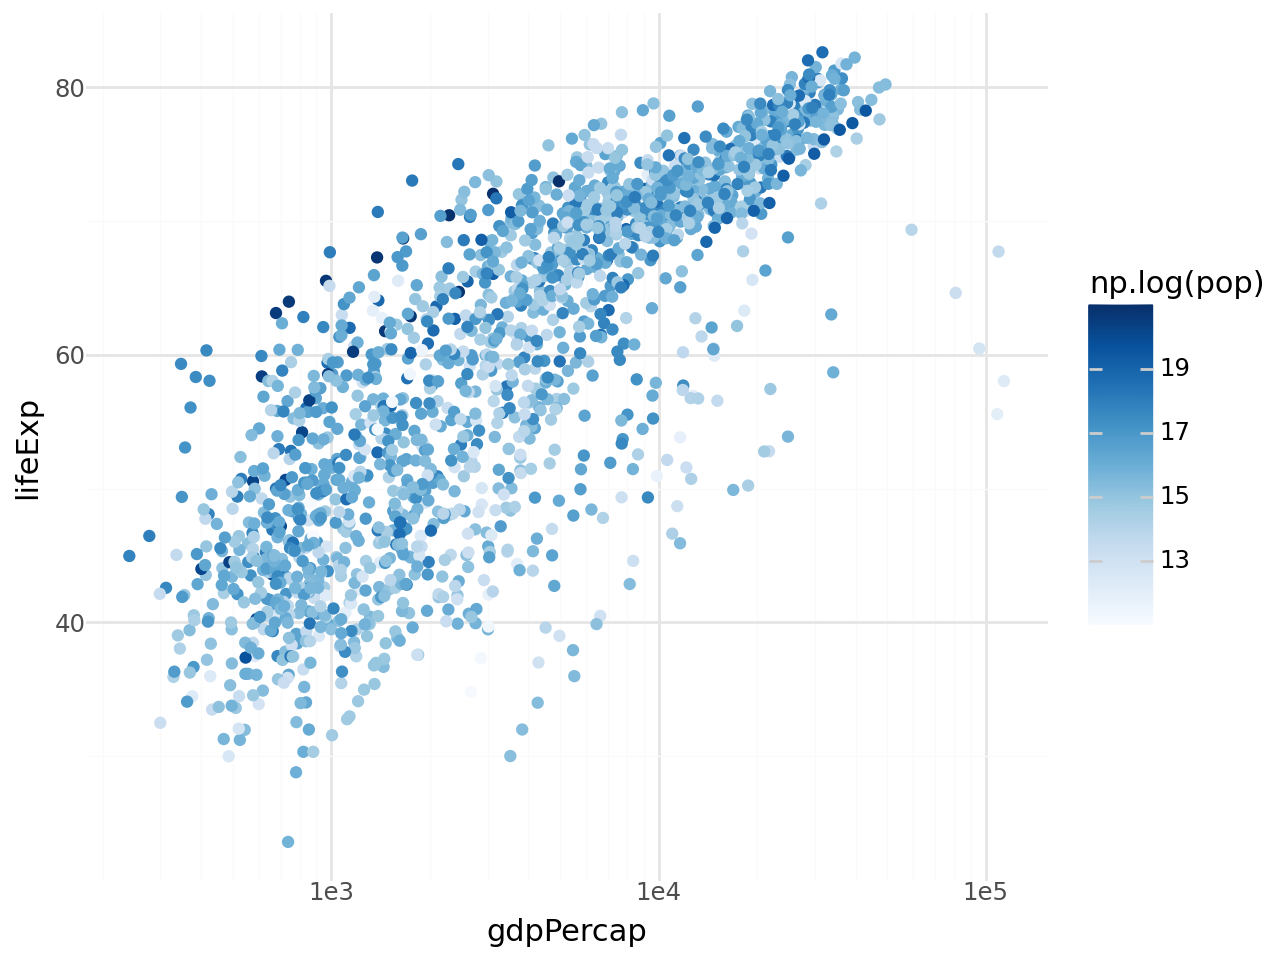

In [33]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(aes(color='np.log(pop)')
) + scale_x_log10(
) + scale_color_continuous('Blues')

If you want to save plotnine graphics, you may use `.save()`. The default figure size is determined by `plotnine.options.figure_size = (WIDTH_IN_INCHES, HEIGHT_IN_INCHES)`. The default value is  6.4 in. x 4.8 in. You can also specify the size of indivisual plots by `theme(figure_size = (...))`

In [34]:
(p + geom_point(aes(color='np.log(pop)')) + scale_x_log10()).save('plot1.png')

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: plot1.png
